# Question_1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrixusion_matrix

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = knn.predict(X_test)

In [11]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 10  3]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.83      0.77      0.80        13
           2       0.79      0.85      0.81        13

    accuracy                           0.89        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.89      0.89      0.89        45



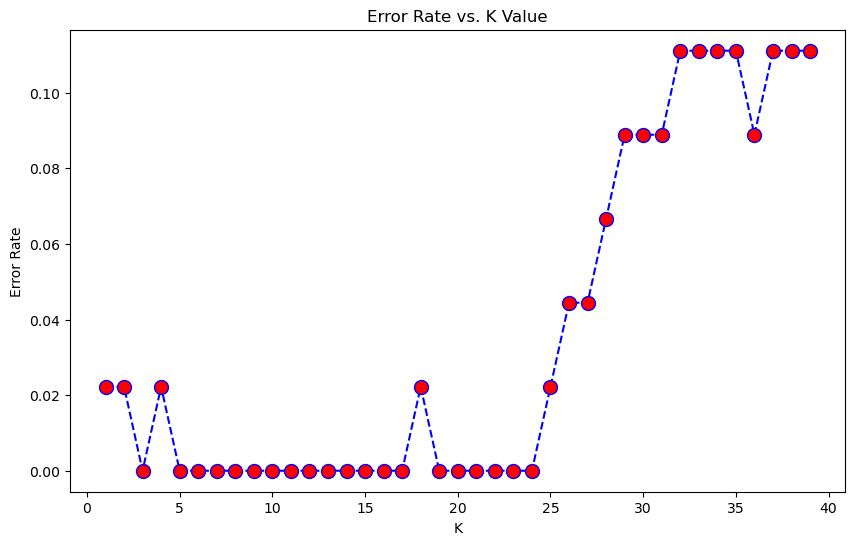

In [12]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Question_2

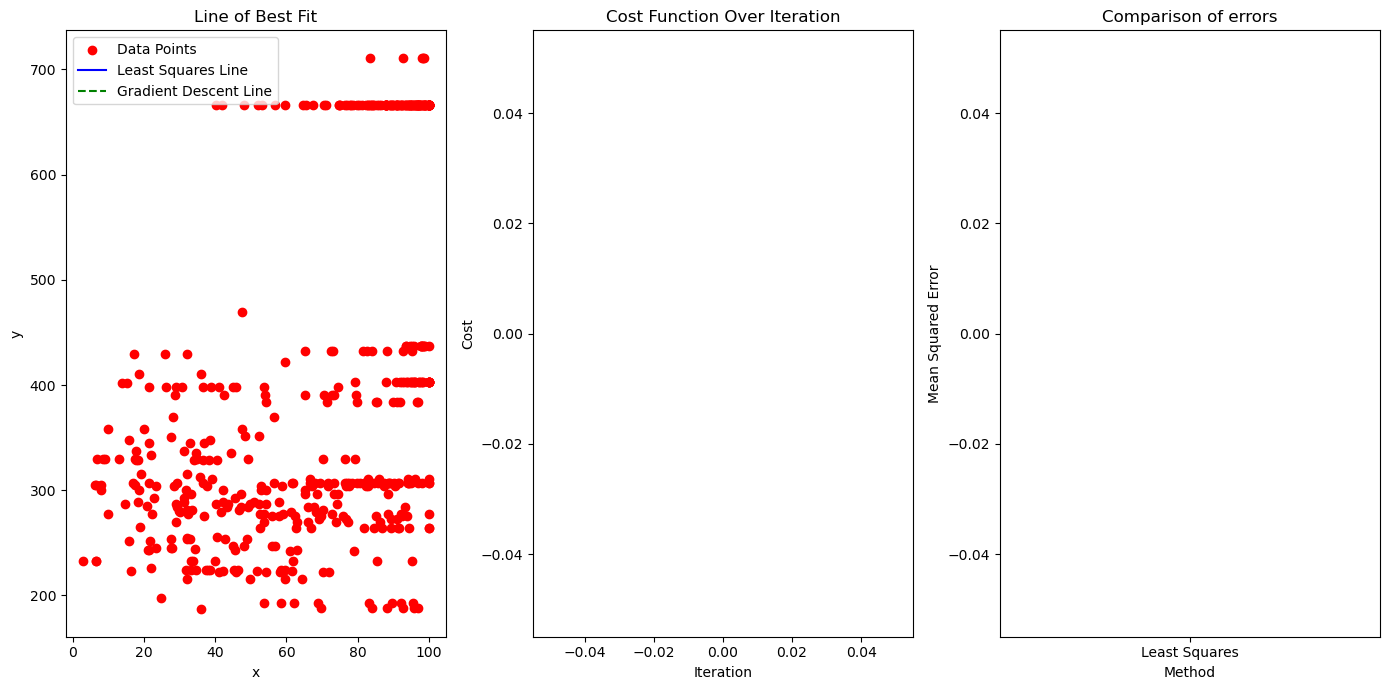

Least square: m = nan, nan, R^2=nan, MSE=nan
Gradient Descent: m = nan, b = nan, R^2=nan, MSE=nan
final cost after gradient descent: nan


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("D:\FinTech_sem3\Lokesh sir\Boston_Housing_dataset.csv")

x_values = data['AGE'].values
y_values = data['TAX'].values

n = len(data)
sum_x=np.sum(x_values)
sum_y=np.sum(y_values)
sum_xy = np.sum(x_values*y_values)
sum_x2=np.sum(x_values**2)

m_ls = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
b_ls = (sum_y *sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x ** 2)

# Cost Function
def cost_function(x_values,y_values,m,b):
    n = len(x_values)
    total_error = np.sum((y_values - (m * x_values + b)) ** 2)
    return total_error / (2 * n)

# Gradient Descent
def gradient_descent(x_values,y_values,m,b,alpha,interations):
    n = len(x_values)
    cost_history = []
    for _ in range(iterations):
        m_gradient = -(1/n) * np.sum(x_values * (y_values - (m * x_values + b)))
        b_gradient = -(1/n) * np.sum(y_values - (m * x_values + b))
        m = m - alpha * m_gradient
        b = b - alpha * b_gradient
        cost = cost_function(x_values, y_values,m ,b)
        cost_history.append(cost)
    return m, b, cost_history

# R^2 Score
def r2_score(y_true,y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)** 2)
    return 1 - (ss_residual / ss_total)

# Mean Square Error
def mean_squared_error(y_true,y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initialize parameters
m_initial = 0
b_initial = 0
alpha = 0.01
iterations = 1000

# perform gradient descent
m_optimal, b_optimal, cost_history = gradient_descent(x_values,y_values,m_initial,b_initial,alpha,iterations)

# predictions
y_pred_ls = m_ls * x_values + b_ls
y_pred_gd = m_optimal * x_values + b_optimal

# Calculate R^2 and MSE
r2_ls = r2_score(y_values,y_pred_ls)
r2_gd = r2_score(y_values,y_pred_gd)
mse_ls=mean_squared_error(y_values,y_pred_ls)
mse_gd = mean_squared_error(y_values,y_pred_gd)

# Plot the results
plt.figure(figsize=(14,7))

# Plot the data points and best-fit lines
plt.subplot(1,3,1)
plt.scatter(x_values,y_values,color="red",label="Data Points")
plt.plot(x_values,y_pred_ls,color="blue",label="Least Squares Line")
plt.plot(x_values,y_pred_gd,color='green',linestyle='dashed',label='Gradient Descent Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line of Best Fit')
plt.legend()

# Plot the cost function
plt.subplot(1,3,2)
plt.plot(range(iterations),cost_history,color='purple')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Over Iteration")

# plot the errors
plt.subplot(1,3,3)
plt.bar(['Least Squares','Gradient Descent'],[mse_ls, mse_gd],color=['blue','green'])
plt.xlabel("Method")
plt.ylabel("Mean Squared Error")
plt.title('Comparison of errors')

plt.tight_layout()
plt.show()

print(f"Least square: m = {m_ls}, {b_ls}, R^2={r2_ls}, MSE={mse_ls}")
print(f"Gradient Descent: m = {m_optimal}, b = {b_optimal}, R^2={r2_gd}, MSE={mse_gd}")
print(f"final cost after gradient descent: {cost_history[-1]}")